# Level 1 – Task 1: Data Preprocessing for Machine Learning

This notebook implements data preprocessing on the `churn-bigml-80.csv` dataset.

Objectives:
- Handle missing data
- Encode categorical variables
- Standardize numerical features
- Split dataset into training and testing sets


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## 1. Load Dataset

In [3]:
df = pd.read_csv("churn-bigml-80.csv")

print("Dataset Shape:", df.shape)
df.head()

print("\nData Types:\n", df.dtypes)

Dataset Shape: (2666, 20)

Data Types:
 State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object


## 2. Dataset Exploration

In [4]:
print("\nDataset Info:\n")
print(df.info())

print("\nMissing Values Before Handling:\n")
print(df.isnull().sum())

print("\nClass Distribution:\n")
print(df["Churn"].value_counts())



Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      

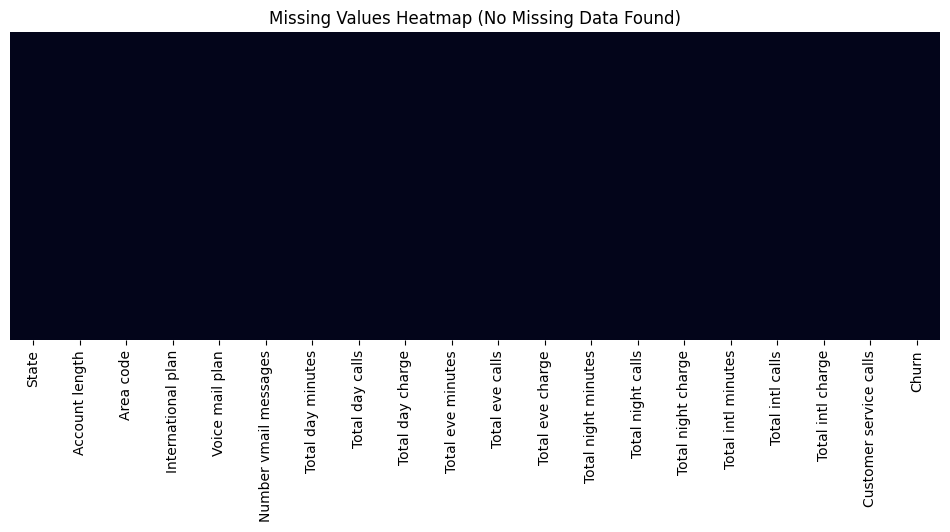

In [5]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap (No Missing Data Found)")
plt.yticks([])
plt.show()


The heatmap shows no missing values in the dataset.
Therefore, no imputation was required for this dataset.


## 3. Separate Features and Target


In [6]:
target_column = "Churn"

X = df.drop(columns=[target_column])
y = df[target_column]

numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns

print("Numerical Columns:", list(numerical_cols))
print("Categorical Columns:", list(categorical_cols))


Numerical Columns: ['Account length', 'Area code', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls']
Categorical Columns: ['State', 'International plan', 'Voice mail plan']


## 4. Handle Missing Values


In [7]:
for col in numerical_cols:
    X[col] = X[col].fillna(X[col].mean())

for col in categorical_cols:
    X[col] = X[col].fillna(X[col].mode()[0])

print("Missing values after handling:\n", X.isnull().sum().sum())

Missing values after handling:
 0


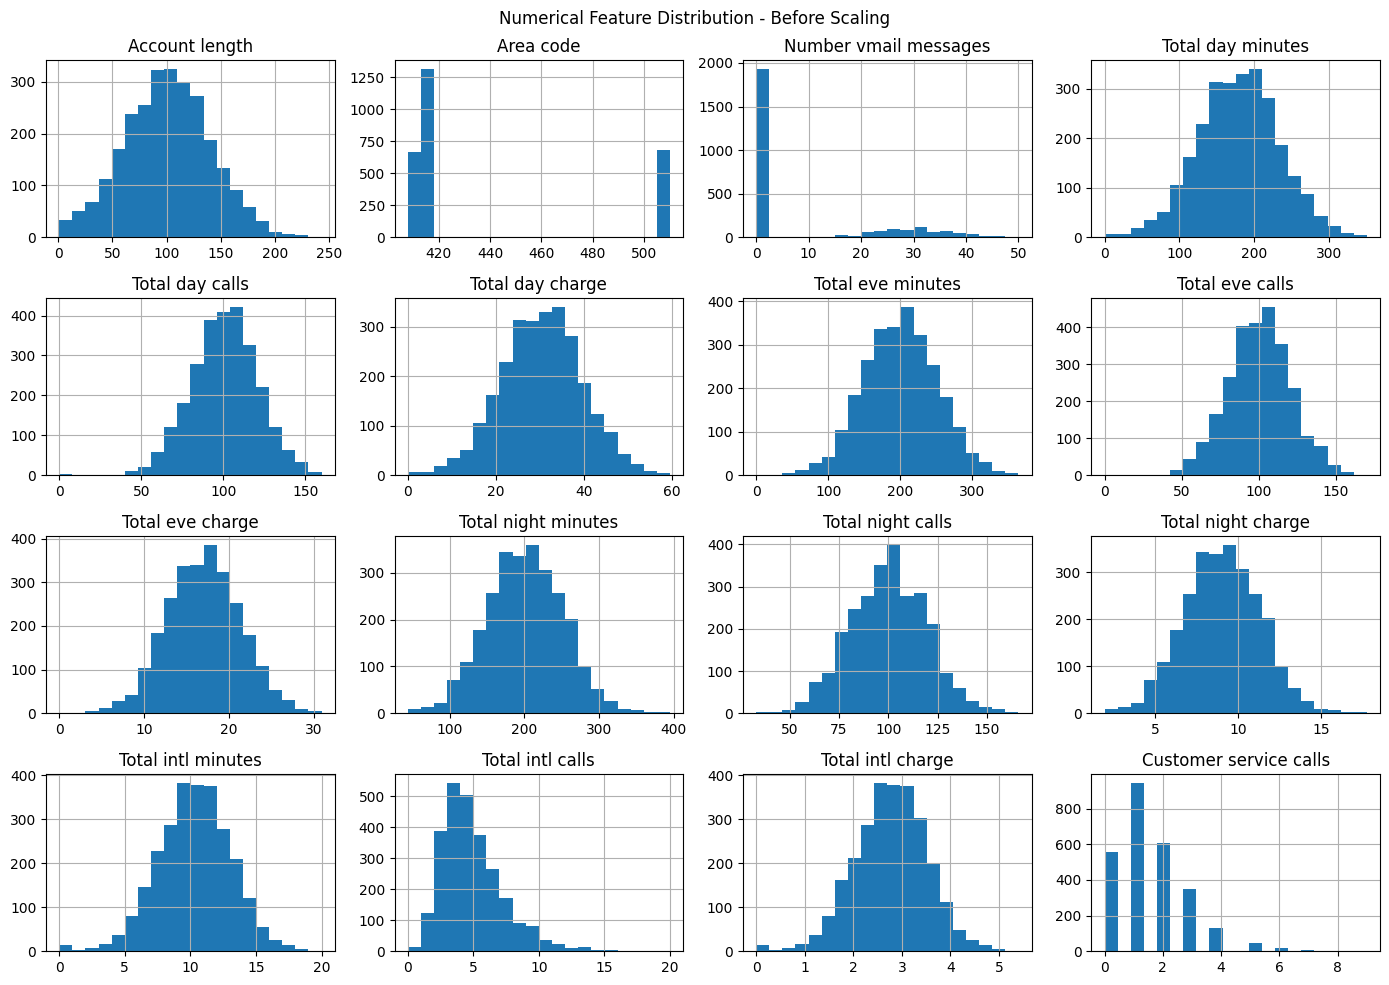

In [8]:
X[numerical_cols].hist(figsize=(14, 10), bins=20)
plt.suptitle("Numerical Feature Distribution - Before Scaling")
plt.tight_layout()
plt.show()

## 5. Encode Categorical Variables


In [9]:
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns

X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print("Shape after encoding:", X.shape)
print("Number of features after encoding:", X.shape[1])


Shape after encoding: (2666, 68)
Number of features after encoding: 68


## 6. Feature Scaling


In [10]:
scaler = StandardScaler()

X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

print("Feature scaling completed.")

Feature scaling completed.


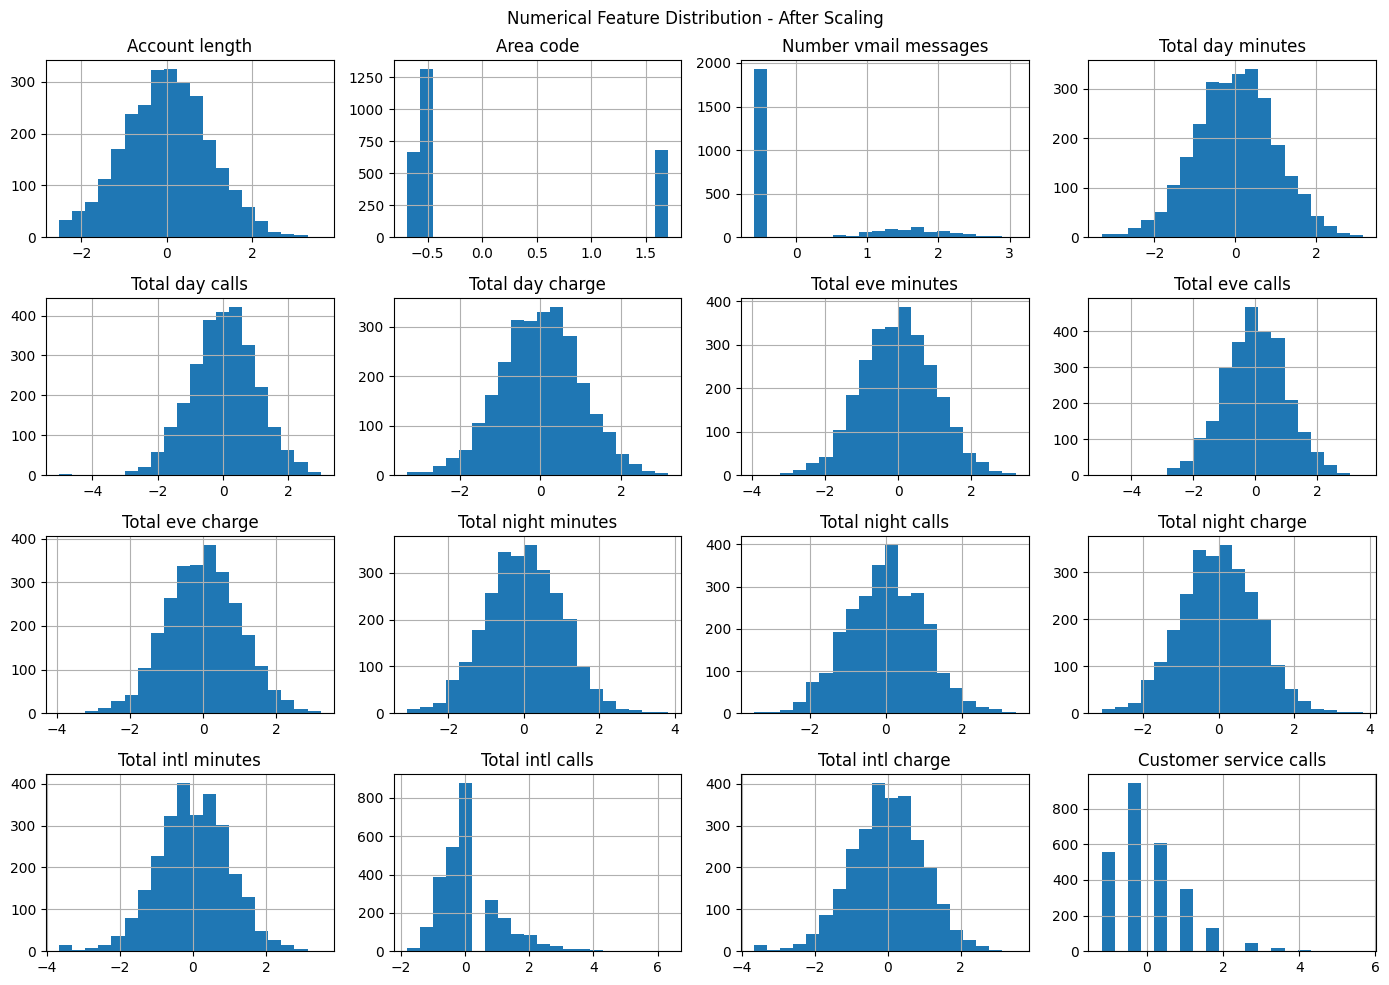

In [11]:
pd.DataFrame(X[numerical_cols], columns=numerical_cols).hist(figsize=(14, 10), bins=20)
plt.suptitle("Numerical Feature Distribution - After Scaling")
plt.tight_layout()
plt.show()


## 7. Train-Test Split


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (2132, 68)
Testing set shape: (534, 68)


## 8. Final Dataset Summary


In [13]:
processed_df = pd.concat([X, y], axis=1)
processed_df.to_csv("processed_churn_data.csv", index=False)


In [15]:
print("Final dataset shape:", X.shape)
display(X.head())
print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)


Final dataset shape: (2666, 68)


,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,International plan_Yes,Voice mail plan_Yes
0,0.692163,-0.527811,1.247508,1.579670,0.484868,1.579942,-0.058619,-0.050781,-0.058445,0.857403,...,False,False,False,False,False,False,False,False,False,True
1,0.161278,-0.527811,1.320985,-0.329918,1.135375,-0.330194,-0.095916,0.147654,-0.095397,1.048458,...,False,False,False,False,False,False,False,False,False,True
2,0.919686,-0.527811,-0.589414,1.179302,0.685024,1.179465,-1.554439,0.494917,-1.554963,-0.759668,...,False,False,False,False,False,False,False,False,False,False
3,-0.420168,-0.692467,-0.589414,2.212509,-1.466653,2.212675,-2.718509,-0.596479,-2.718922,-0.084083,...,False,False,False,False,False,False,False,False,True,False
4,-0.647691,-0.527811,-0.589414,-0.235822,0.634985,-0.235772,-1.022461,1.090224,-1.021482,-0.281046,...,False,False,False,False,False,False,False,False,True,False


Training set: (2132, 68)
Testing set: (534, 68)


## Conclusion

The dataset has been successfully cleaned and transformed.

- Missing values were handled.
- Categorical variables were encoded.
- Numerical features were standardized.
- The dataset was split into training and testing sets.

The data is now ready for machine learning modeling.
